In [2]:
import re
import pickle
import os

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') 

In [3]:
news_files=os.listdir('news_crawling')

counter_news_file=Counter([i.split('_')[0] for i in news_files]).most_common()

news_brands = [i[0] for i in counter_news_file]

중앙일보


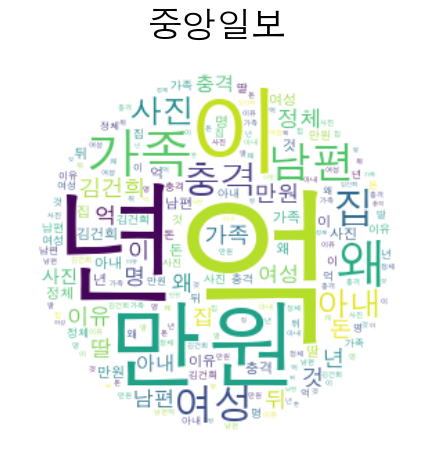

In [4]:
for news_brand in news_brands[:1]:
    pickle_files=[i for i in news_files if i.startswith(news_brand)]
    news = list()
    for pickle_file in pickle_files:
        with open(f'news_crawling/{pickle_file}', 'rb') as f:
            news.append(pickle.load(f))
    _news_str=re.sub(r"[^\uAC00-\uD7A3\s]", "", ''.join(sum(news,[])))
    
    # 큰의미 없는 단독 제거
    _news_str=_news_str.replace("단독","")
    
    
    
    # open으로 txt파일을 열고 read()를 이용하여 읽는다.
    text = _news_str


    okt = Okt()

    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []
    sentences_tag = okt.pos(text) 

    noun_adj_list = []


    # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun' , 'Adjective']: 
            noun_adj_list.append(word)


    # 가장 많이 나온 단어부터 40개를 저장한다.
    counts = Counter(noun_adj_list)
    tags = counts.most_common(20) 


    # WordCloud를 생성한다.
    # 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
    # 지정해준다. (ex. '/Font/GodoM.otf')
    # wc = WordCloud(background_color="white", max_font_size=60,font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
    # cloud = wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wc = WordCloud(background_color="white", repeat=True, mask=mask, prefer_horizontal=True,
                font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
    wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))
    print(news_brand)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(news_brand,fontsize=25,fontweight='bold')
    plt.tight_layout()
    plt.show()

In [10]:
counts.most_common(20)

[('억', 51),
 ('년', 29),
 ('만원', 26),
 ('이', 24),
 ('가족', 24),
 ('왜', 22),
 ('남편', 20),
 ('여성', 18),
 ('집', 18),
 ('충격', 16),
 ('아내', 15),
 ('사진', 15),
 ('김건희', 15),
 ('명', 15),
 ('뒤', 15),
 ('이유', 14),
 ('정체', 14),
 ('돈', 14),
 ('딸', 14),
 ('것', 14)]